# GOT-10k Python Toolkit

This notebook provides examples on how to use the GOT-10k toolkit.

In [1]:
ROOT_DIR = '../data/GOT-10k'
OTB_DIR = '../data/OTB'
VOT_DIR = '../data/vot2018'

%matplotlib inline

Running tracker IdentityTracker on GOT-10k...
--Sequence 1/180: GOT-10k_Val_000001
 Repetition: 1
  Found results, skipping GOT-10k_Val_000001
--Sequence 2/180: GOT-10k_Val_000002
 Repetition: 1
  Found results, skipping GOT-10k_Val_000002
--Sequence 3/180: GOT-10k_Val_000003
 Repetition: 1
  Found results, skipping GOT-10k_Val_000003
--Sequence 4/180: GOT-10k_Val_000004
 Repetition: 1
  Found results, skipping GOT-10k_Val_000004
--Sequence 5/180: GOT-10k_Val_000005
 Repetition: 1
  Found results, skipping GOT-10k_Val_000005
--Sequence 6/180: GOT-10k_Val_000006
 Repetition: 1
  Found results, skipping GOT-10k_Val_000006
--Sequence 7/180: GOT-10k_Val_000007
 Repetition: 1
  Found results, skipping GOT-10k_Val_000007
--Sequence 8/180: GOT-10k_Val_000008
 Repetition: 1
  Found results, skipping GOT-10k_Val_000008
--Sequence 9/180: GOT-10k_Val_000009
 Repetition: 1
  Found results, skipping GOT-10k_Val_000009
--Sequence 10/180: GOT-10k_Val_000010
 Repetition: 1
  Found results, skipping GO

--Sequence 123/180: GOT-10k_Val_000123
 Repetition: 1
  Found results, skipping GOT-10k_Val_000123
--Sequence 124/180: GOT-10k_Val_000124
 Repetition: 1
  Found results, skipping GOT-10k_Val_000124
--Sequence 125/180: GOT-10k_Val_000125
 Repetition: 1
  Found results, skipping GOT-10k_Val_000125
--Sequence 126/180: GOT-10k_Val_000126
 Repetition: 1
  Found results, skipping GOT-10k_Val_000126
--Sequence 127/180: GOT-10k_Val_000127
 Repetition: 1
  Found results, skipping GOT-10k_Val_000127
--Sequence 128/180: GOT-10k_Val_000128
 Repetition: 1
  Found results, skipping GOT-10k_Val_000128
--Sequence 129/180: GOT-10k_Val_000129
 Repetition: 1
  Found results, skipping GOT-10k_Val_000129
--Sequence 130/180: GOT-10k_Val_000130
 Repetition: 1
  Found results, skipping GOT-10k_Val_000130
--Sequence 131/180: GOT-10k_Val_000131
 Repetition: 1
  Found results, skipping GOT-10k_Val_000131
--Sequence 132/180: GOT-10k_Val_000132
 Repetition: 1
  Found results, skipping GOT-10k_Val_000132
--Sequence

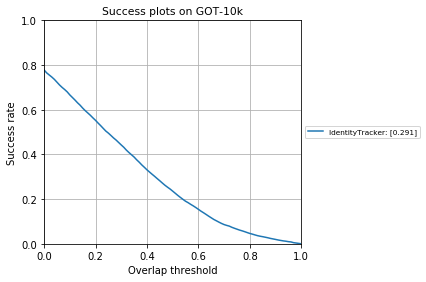

In [2]:
# 1. Quick Start: A Concise Example

from got10k.trackers import BaseTracker
from got10k.experiments import ExperimentGOT10k

class IdentityTracker(BaseTracker):
    """Example on how to define a tracker.

        To define a tracker, simply override ``init`` and ``update`` methods
            from ``BaseTracker`` with your own pipelines.
    """
    def __init__(self):
        super(IdentityTracker, self).__init__(
            name='IdentityTracker', # name of the tracker
            is_deterministic=True   # deterministic (True) or stochastic (False)
        )
    
    def init(self, image, box):
        """Initialize your tracking model in the first frame
        
        Arguments:
            image {PIL.Image} -- Image in the first frame.
            box {np.ndarray} -- Target bounding box (4x1,
                [left, top, width, height]) in the first frame.
        """
        self.box = box

    def update(self, image):
        """Locate target in an new frame and return the estimated bounding box.
        
        Arguments:
            image {PIL.Image} -- Image in a new frame.
        
        Returns:
            np.ndarray -- Estimated target bounding box (4x1,
                [left, top, width, height]) in ``image``.
        """
        return self.box

if __name__ == '__main__':
    # setup tracker
    tracker = IdentityTracker()

    # setup experiment (validation subset)
    experiment = ExperimentGOT10k(
        root_dir=ROOT_DIR,          # GOT-10k's root directory
        subset='val',               # 'train' | 'val' | 'test'
        result_dir='results',       # where to store tracking results
        report_dir='reports'        # where to store evaluation reports
    )

    # run experiments on GOT-10k
    experiment.run(tracker, visualize=False)

    # report performance on GOT-10k (validation subset)
    experiment.report([tracker.name])

Sequence: GOT-10k_Val_000001
Sequence length: 60
Sequence: GOT-10k_Val_000002
Sequence length: 100
Sequence: GOT-10k_Val_000003
Sequence length: 80
Sequence: GOT-10k_Val_000004
Sequence length: 91
Sequence: GOT-10k_Val_000005
Sequence length: 80
Sequence: GOT-10k_Val_000006
Sequence length: 80
Sequence: GOT-10k_Val_000007
Sequence length: 100
Sequence: GOT-10k_Val_000008
Sequence length: 90
Sequence: GOT-10k_Val_000009
Sequence length: 100
Sequence: GOT-10k_Val_000010
Sequence length: 99
Sequence: GOT-10k_Val_000011
Sequence length: 100
Sequence: GOT-10k_Val_000012
Sequence length: 70
Sequence: GOT-10k_Val_000013
Sequence length: 100
Sequence: GOT-10k_Val_000014
Sequence length: 100
Sequence: GOT-10k_Val_000015
Sequence length: 120
Sequence: GOT-10k_Val_000016
Sequence length: 100
Sequence: GOT-10k_Val_000017
Sequence length: 100
Sequence: GOT-10k_Val_000018
Sequence length: 100
Sequence: GOT-10k_Val_000019
Sequence length: 100
Sequence: GOT-10k_Val_000020
Sequence length: 98
Sequence:

Sequence: GOT-10k_Val_000179
Sequence length: 421
Sequence: GOT-10k_Val_000180
Sequence length: 108


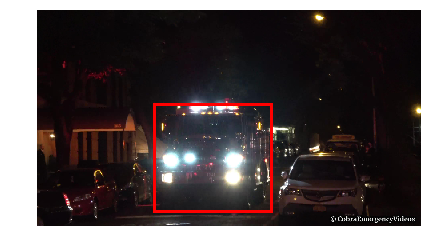

<Figure size 432x288 with 0 Axes>

In [3]:
# 2. Loop Over GOT-10k

from PIL import Image
from got10k.datasets import GOT10k
from got10k.utils.viz import show_frame

# setup dataset
dataset = GOT10k(ROOT_DIR, subset='val')

# index dataset
img_files, anno = dataset[10]

# loop over the complete dataset
for s, (img_files, anno) in enumerate(dataset):
    seq_name = dataset.seq_names[s]
    print('Sequence:', seq_name)
    
    assert len(img_files) == len(anno)
    print('Sequence length:', len(img_files))
    
# visualize an example
image = Image.open(img_files[10])
show_frame(image, anno[10, :])

In [4]:
# 3. Evaluate on Test Set of GOT-10k

tracker = IdentityTracker()

experiment = ExperimentGOT10k(
    root_dir=ROOT_DIR,
    subset='test')
experiment.run(tracker)

# a ".zip" file will be generated ready for submission
# follow the guide to submit your results to
# http://aitestunion.com/got-10k
experiment.report([tracker.name])

[WARNING]:
The groundtruths of GOT-10k's test set is withholded.
You will have to submit your results to
[http://aitestunion.com/got-10k]
to access the performance.
Running tracker IdentityTracker on GOT-10k...
--Sequence 1/180: GOT-10k_Test_000001
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000001/GOT-10k_Test_000001_001.txt
--Sequence 2/180: GOT-10k_Test_000002
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000002/GOT-10k_Test_000002_001.txt
--Sequence 3/180: GOT-10k_Test_000003
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000003/GOT-10k_Test_000003_001.txt
--Sequence 4/180: GOT-10k_Test_000004
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000004/GOT-10k_Test_000004_001.txt
--Sequence 5/180: GOT-10k_Test_000005
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000005/GOT-10k_Test_000005_001.txt
--Sequence 6/1

--Sequence 54/180: GOT-10k_Test_000054
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000054/GOT-10k_Test_000054_001.txt
--Sequence 55/180: GOT-10k_Test_000055
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000055/GOT-10k_Test_000055_001.txt
--Sequence 56/180: GOT-10k_Test_000056
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000056/GOT-10k_Test_000056_001.txt
--Sequence 57/180: GOT-10k_Test_000057
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000057/GOT-10k_Test_000057_001.txt
--Sequence 58/180: GOT-10k_Test_000058
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000058/GOT-10k_Test_000058_001.txt
--Sequence 59/180: GOT-10k_Test_000059
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000059/GOT-10k_Test_000059_001.txt
--Sequence 60/180: GOT-10k_Test_000060
 Repetition: 1
  Results 

  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000108/GOT-10k_Test_000108_001.txt
--Sequence 109/180: GOT-10k_Test_000109
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000109/GOT-10k_Test_000109_001.txt
--Sequence 110/180: GOT-10k_Test_000110
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000110/GOT-10k_Test_000110_001.txt
--Sequence 111/180: GOT-10k_Test_000111
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000111/GOT-10k_Test_000111_001.txt
--Sequence 112/180: GOT-10k_Test_000112
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000112/GOT-10k_Test_000112_001.txt
--Sequence 113/180: GOT-10k_Test_000113
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000113/GOT-10k_Test_000113_001.txt
--Sequence 114/180: GOT-10k_Test_000114
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-

  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000162/GOT-10k_Test_000162_001.txt
--Sequence 163/180: GOT-10k_Test_000163
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000163/GOT-10k_Test_000163_001.txt
--Sequence 164/180: GOT-10k_Test_000164
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000164/GOT-10k_Test_000164_001.txt
--Sequence 165/180: GOT-10k_Test_000165
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000165/GOT-10k_Test_000165_001.txt
--Sequence 166/180: GOT-10k_Test_000166
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000166/GOT-10k_Test_000166_001.txt
--Sequence 167/180: GOT-10k_Test_000167
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-10k_Test_000167/GOT-10k_Test_000167_001.txt
--Sequence 168/180: GOT-10k_Test_000168
 Repetition: 1
  Results recorded at results/GOT-10k/IdentityTracker/GOT-

Files already downloaded.
Running tracker IdentityTracker on OTB...
--Sequence 1/100: Basketball
  Results recorded at results/OTB2015/IdentityTracker/Basketball.txt
--Sequence 2/100: Biker
  Results recorded at results/OTB2015/IdentityTracker/Biker.txt
--Sequence 3/100: Bird1
  Results recorded at results/OTB2015/IdentityTracker/Bird1.txt
--Sequence 4/100: Bird2
  Results recorded at results/OTB2015/IdentityTracker/Bird2.txt
--Sequence 5/100: BlurBody
  Results recorded at results/OTB2015/IdentityTracker/BlurBody.txt
--Sequence 6/100: BlurCar1
  Results recorded at results/OTB2015/IdentityTracker/BlurCar1.txt
--Sequence 7/100: BlurCar2
  Results recorded at results/OTB2015/IdentityTracker/BlurCar2.txt
--Sequence 8/100: BlurCar3
  Results recorded at results/OTB2015/IdentityTracker/BlurCar3.txt
--Sequence 9/100: BlurCar4
  Results recorded at results/OTB2015/IdentityTracker/BlurCar4.txt
--Sequence 10/100: BlurFace
  Results recorded at results/OTB2015/IdentityTracker/BlurFace.txt
--Seq

  Results recorded at results/OTB2015/IdentityTracker/Suv.txt
--Sequence 90/100: Sylvester
  Results recorded at results/OTB2015/IdentityTracker/Sylvester.txt
--Sequence 91/100: Tiger1
  Results recorded at results/OTB2015/IdentityTracker/Tiger1.txt
--Sequence 92/100: Tiger2
  Results recorded at results/OTB2015/IdentityTracker/Tiger2.txt
--Sequence 93/100: Toy
  Results recorded at results/OTB2015/IdentityTracker/Toy.txt
--Sequence 94/100: Trans
  Results recorded at results/OTB2015/IdentityTracker/Trans.txt
--Sequence 95/100: Trellis
  Results recorded at results/OTB2015/IdentityTracker/Trellis.txt
--Sequence 96/100: Twinnings
  Results recorded at results/OTB2015/IdentityTracker/Twinnings.txt
--Sequence 97/100: Vase
  Results recorded at results/OTB2015/IdentityTracker/Vase.txt
--Sequence 98/100: Walking
  Results recorded at results/OTB2015/IdentityTracker/Walking.txt
--Sequence 99/100: Walking2
  Results recorded at results/OTB2015/IdentityTracker/Walking2.txt
--Sequence 100/100: 

  Results recorded at results/VOT2018/IdentityTracker/baseline/soldier/soldier_001.txt
--Sequence 57/60: tiger
 Repetition: 1
  Results recorded at results/VOT2018/IdentityTracker/baseline/tiger/tiger_001.txt
--Sequence 58/60: traffic
 Repetition: 1
  Results recorded at results/VOT2018/IdentityTracker/baseline/traffic/traffic_001.txt
--Sequence 59/60: wiper
 Repetition: 1
  Results recorded at results/VOT2018/IdentityTracker/baseline/wiper/wiper_001.txt
--Sequence 60/60: zebrafish1
 Repetition: 1
  Results recorded at results/VOT2018/IdentityTracker/baseline/zebrafish1/zebrafish1_001.txt
Running unsupervised experiment...
--Sequence 1/60: ants1
  Results recorded at results/VOT2018/IdentityTracker/unsupervised/ants1/ants1_001.txt
--Sequence 2/60: ants3
  Results recorded at results/VOT2018/IdentityTracker/unsupervised/ants3/ants3_001.txt
--Sequence 3/60: bag
  Results recorded at results/VOT2018/IdentityTracker/unsupervised/bag/bag_001.txt
--Sequence 4/60: ball1
  Results recorded at 

  Results recorded at results/VOT2018/IdentityTracker/realtime/basketball/basketball_001.txt
--Sequence 7/60: birds1
  Results recorded at results/VOT2018/IdentityTracker/realtime/birds1/birds1_001.txt
--Sequence 8/60: blanket
  Results recorded at results/VOT2018/IdentityTracker/realtime/blanket/blanket_001.txt
--Sequence 9/60: bmx
  Results recorded at results/VOT2018/IdentityTracker/realtime/bmx/bmx_001.txt
--Sequence 10/60: bolt1
  Results recorded at results/VOT2018/IdentityTracker/realtime/bolt1/bolt1_001.txt
--Sequence 11/60: bolt2
  Results recorded at results/VOT2018/IdentityTracker/realtime/bolt2/bolt2_001.txt
--Sequence 12/60: book
  Results recorded at results/VOT2018/IdentityTracker/realtime/book/book_001.txt
--Sequence 13/60: butterfly
  Results recorded at results/VOT2018/IdentityTracker/realtime/butterfly/butterfly_001.txt
--Sequence 14/60: car1
  Results recorded at results/VOT2018/IdentityTracker/realtime/car1/car1_001.txt
--Sequence 15/60: conduction1
  Results recor

{'IdentityTracker': {'accuracy': 0.2824412420009162,
  'robustness': 190.6033546928006,
  'speed_fps': 1225.4844753494033}}

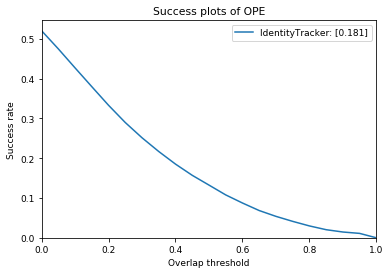

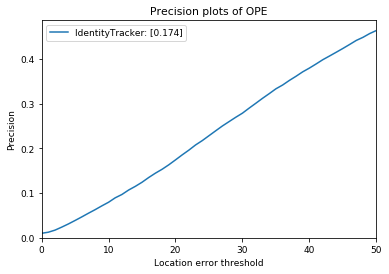

In [5]:
# 4. Run Experiments on OTB and VOT

from got10k.experiments import ExperimentOTB, ExperimentVOT

tracker = IdentityTracker()

# run and evaluate on OTB
experiment = ExperimentOTB(root_dir=OTB_DIR)
experiment.run(tracker, visualize=False)
experiment.report([tracker.name])

# run and evaluate on VOT2018
experiment = ExperimentVOT(root_dir=VOT_DIR, version=2018)
experiment.run(tracker, visualize=False)
experiment.report([tracker.name])

In [6]:
# 5. Loop Over OTB and VOT Datasets

from got10k.datasets import OTB, VOT

def loop_dataset(dataset):
    for s, (img_files, anno) in enumerate(dataset):
        seq_name = dataset.seq_names[s]
        print('Sequence:', seq_name)
        
        assert(len(img_files) == len(anno))
        print('Sequence length:', len(img_files))

# loop over OTB
dataset = OTB(root_dir=OTB_DIR, version=2015)
loop_dataset(dataset)

# loop over VOT
dataset = VOT(root_dir=VOT_DIR, version=2018)
loop_dataset(dataset)

Files already downloaded.
Sequence: Basketball
Sequence length: 725
Sequence: Biker
Sequence length: 142
Sequence: Bird1
Sequence length: 408
Sequence: Bird2
Sequence length: 99
Sequence: BlurBody
Sequence length: 334
Sequence: BlurCar1
Sequence length: 742
Sequence: BlurCar2
Sequence length: 585
Sequence: BlurCar3
Sequence length: 357
Sequence: BlurCar4
Sequence length: 380
Sequence: BlurFace
Sequence length: 493
Sequence: BlurOwl
Sequence length: 631
Sequence: Board
Sequence length: 698
Sequence: Bolt
Sequence length: 350
Sequence: Bolt2
Sequence length: 293
Sequence: Box
Sequence length: 1161
Sequence: Boy
Sequence length: 602
Sequence: Car1
Sequence length: 1020
Sequence: Car2
Sequence length: 913
Sequence: Car24
Sequence length: 3059
Sequence: Car4
Sequence length: 659
Sequence: CarDark
Sequence length: 393
Sequence: CarScale
Sequence length: 252
Sequence: ClifBar
Sequence length: 472
Sequence: Coke
Sequence length: 291
Sequence: Couple
Sequence length: 140
Sequence: Coupon
Sequen